In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-17 12:39:38.338897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 12:39:38.347768: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 12:39:38.350399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 12:39:38.814419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Wd hyperparams: [9.999999999999997e-06, 1.9999999999999998e-05, 3.9999999999999996e-05, 8e-05, 0.00016, 0.0003200000000000001, 0.0006400000000000002, 0.0012800000000000005, 0.0025600000000000015, 0.005119999999999999, 0.010239999999999997] |
 [-11.51292546 -10.81977828 -10.1266311   -9.43348392  -8.74033674
  -8.04718956  -7.35404238  -6.6608952   -5.96774802  -5.27460084
  -4.58145366]


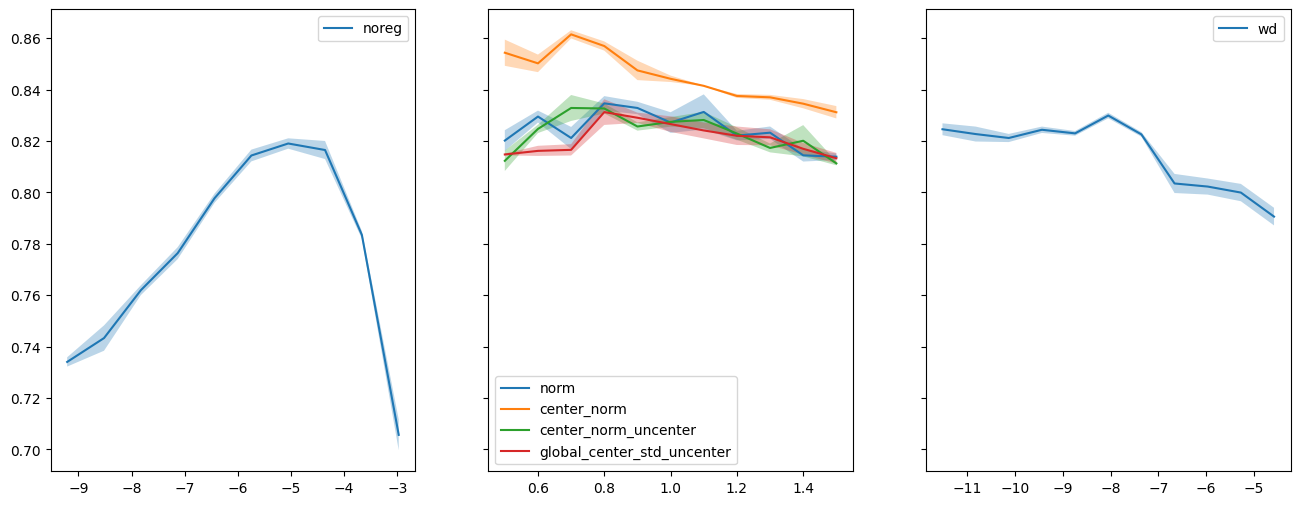

In [14]:
fig,axs = plt.subplots(ncols=3,nrows=1,sharey="all")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/noreg"),
                               lambda subpath: np.log(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[0], norm=False,label="noreg")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/norm"),
                                lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")),axs[1], norm=False,label="norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/center_norm"),
                                lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")),axs[1], norm=False,label="center_norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/center_norm_uncenter"),
                                lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")),axs[1], norm=False,label="center_norm_uncenter")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/global_center_std_uncenter"),
                                lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")),axs[1], norm=False,label="global_center_std_uncenter")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wobn/wd"),
                               lambda subpath: np.log(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[2], norm=False,label="wd")
print(f"Wd hyperparams: {[np.exp(e) for e in x]} |\n {x}")
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.set_size_inches(16,6)

In [ ]:
"""
import json
writer = write(name="s_wobn",path="../../run/sgdm_wobn",h=12,max_tasks=11)
for norm_fn in ["norm","center_norm_uncenter","center_norm","global_center_std_uncenter"]:
    for p in [0.2,0.3,0.4]:
        with open("../../data/sgdm_wobn/noreg/0.0064/settings.json", "r") as f:
            js = json.load(f)

        del js["save_path"]
        js["num_steps"] = 100000
        js["save_args"]["save_states_every"] = 100000
        js["save_args"]["save_grad_every"] = -1
        js["at_step"] = 0
        js["norm"]["norm_every"] = 1
        js["norm"]["norm_multiply"] = p
        js["norm"]["norm_fn"] = norm_fn
        js["norm"]["apply_norm_to"] = "conv&kernel|out&kernel"

        os.makedirs(f"../../data/sgdm_wobn/{norm_fn}/{p}_1",exist_ok=True)
        with open(f"../../data/sgdm_wobn/{norm_fn}/{p}_1/settings.json","w") as f:
            json.dump(js,f)

        writer.write(f"python code/main.py ./data/sgdm_wobn/{norm_fn}/{p}_1/ --reset \n")

start_wd = 0.00001
for i in range(3):
    with open("../../data/sgdm_wobn/noreg/0.0064/settings.json", "r") as f:
        js = json.load(f)

    wd = start_wd/(2**i)
    js["optimizer"]["lambda_wd"] = wd
    js["optimizer"]["apply_wd_to"] = "conv&kernel|out&kernel"

    os.makedirs(f"../../data/sgdm_wobn/wd/{str(round(wd,8))}",exist_ok=True)
    with open(f"../../data/sgdm_wobn/wd/{str(round(wd,8))}/settings.json","w") as f:
        json.dump(js,f)

    writer.write(f"python code/main.py ./data/sgdm_wobn/wd/{str(round(wd,8))}/ --reset \n")

"""


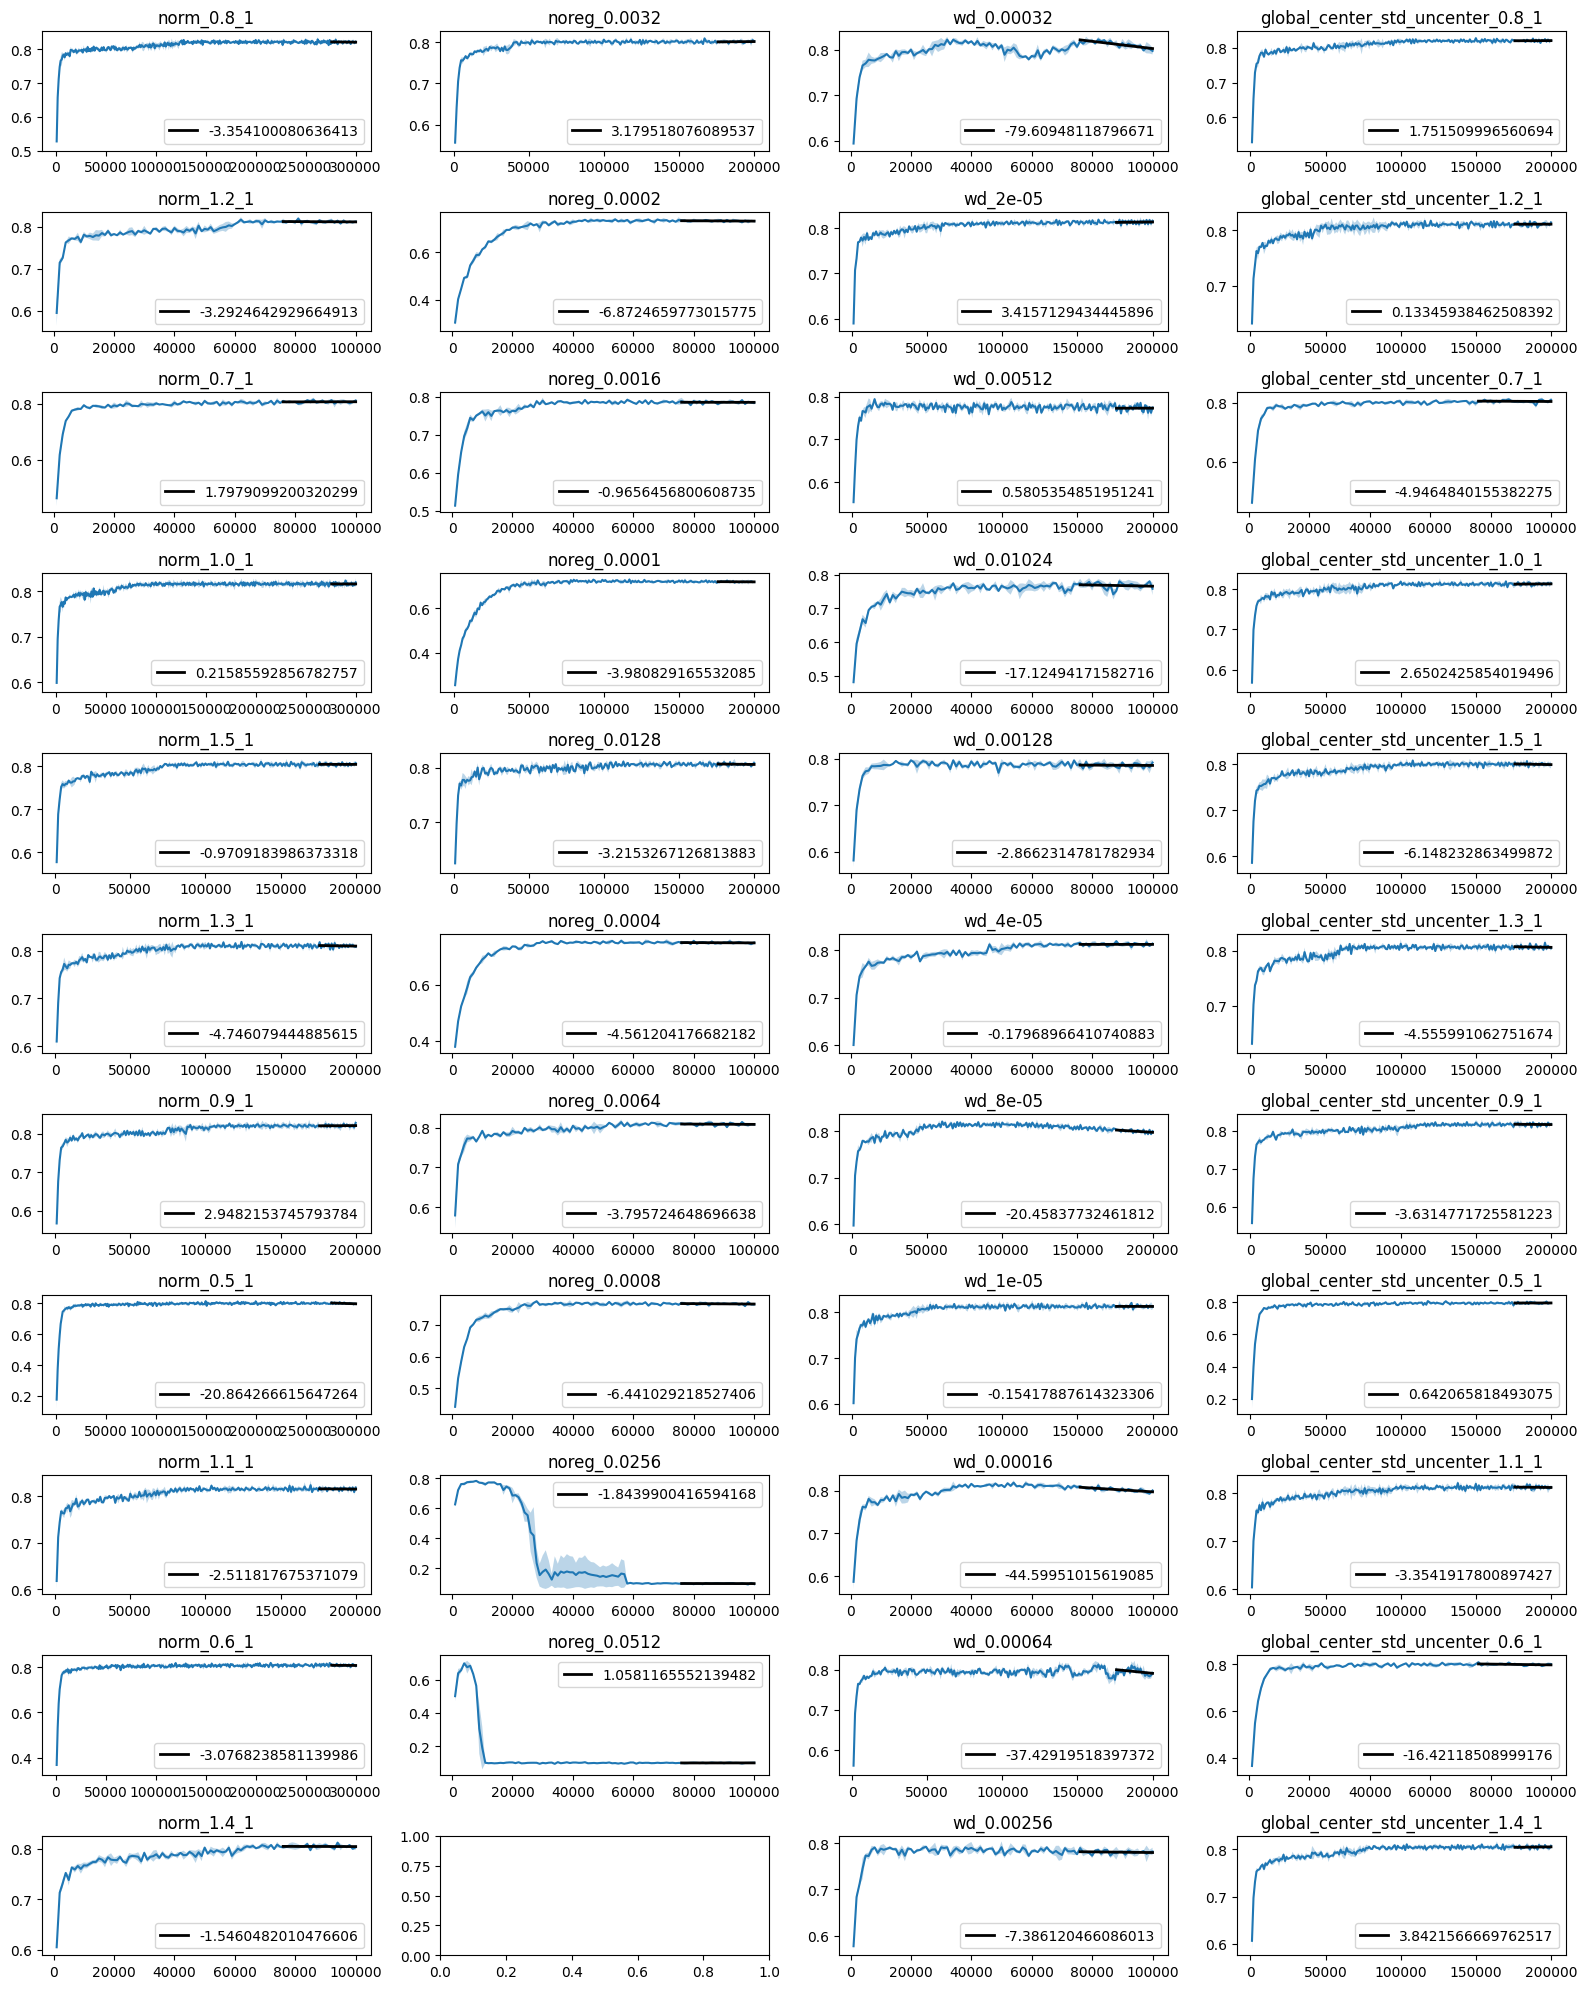

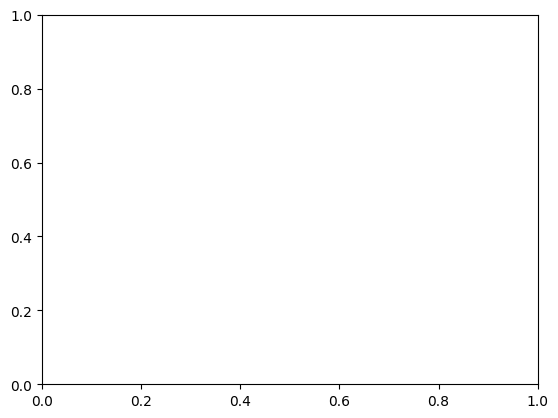

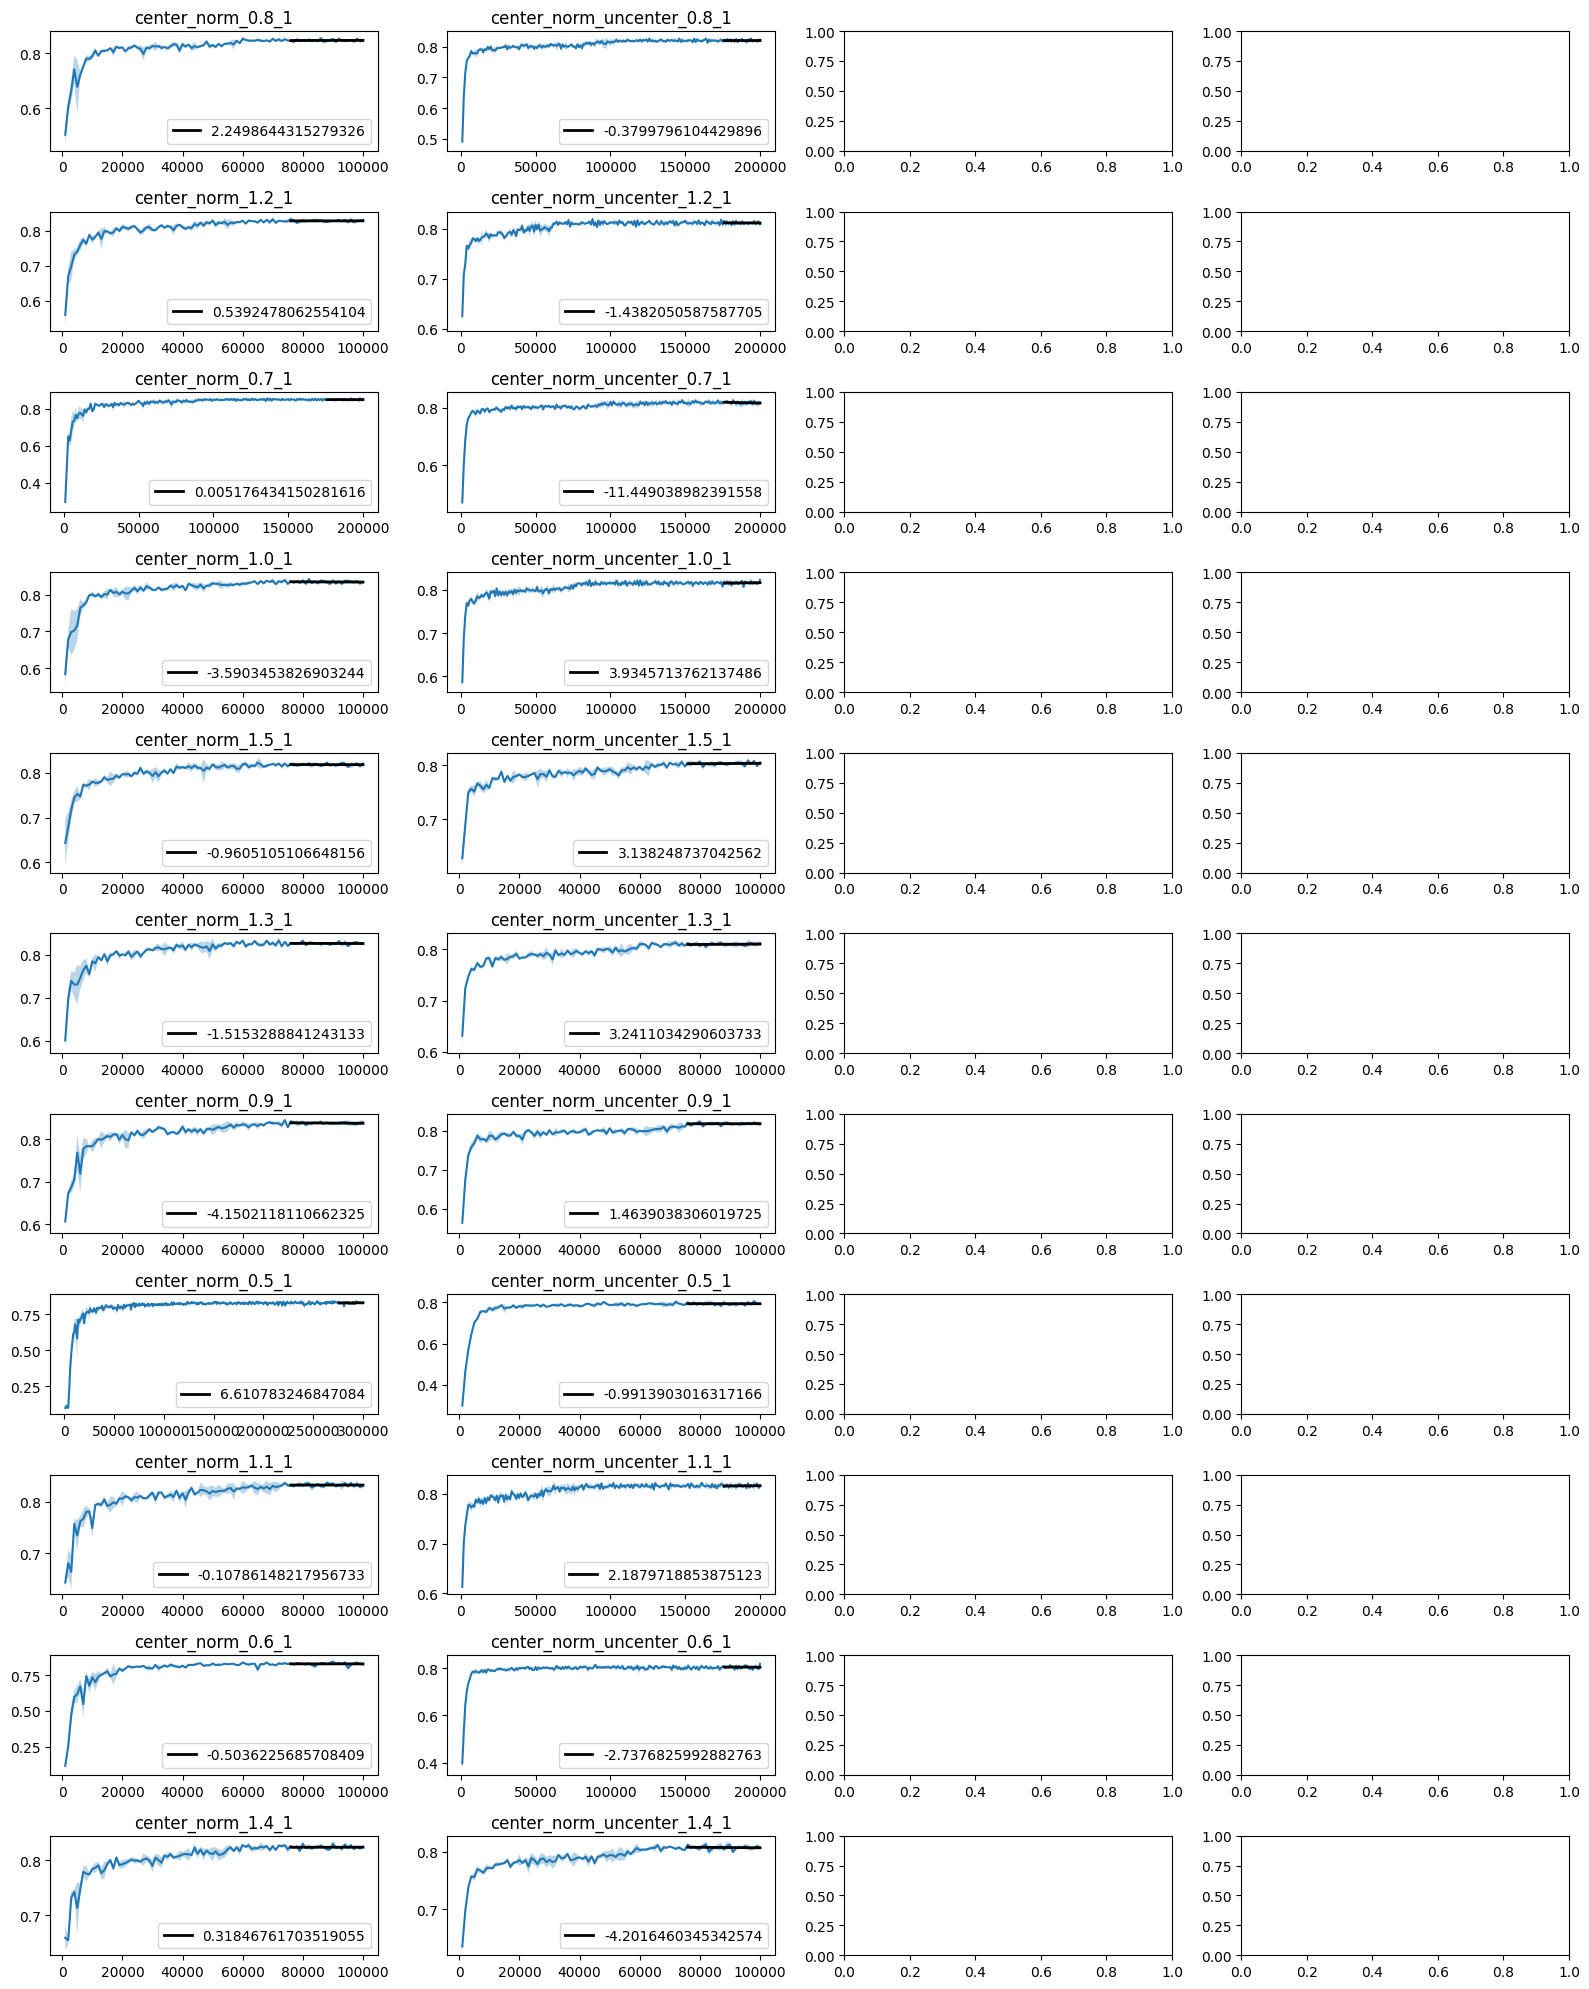

In [3]:
writer = write(name="s_wobn",path="../../run/sgdm_wobn",h=12,max_tasks=20)

fig,axs = plt.subplots(nrows=11,ncols=4)
cur_col = 0
setting = "sgdm_wobn"
for exp in os.listdir(f"../../data/{setting}"):

    if os.path.exists(os.path.join(f"../../data/{setting}",exp,"settings.json")):
        continue

    hyperparams = list(os.listdir(os.path.join(f"../../data/{setting}",exp)))

    for row,hyperparam in enumerate(hyperparams):
        if not os.path.exists(os.path.join(f"../../data/{setting}",exp,hyperparam,"test_stats")):
            axs[row][cur_col].set_title(exp + "_" + hyperparam)
            continue
        path = os.path.join(f"../../data/{setting}",exp,hyperparam)
        stats = get_stats(path,"test_stats")
        last_vals = np.mean(np.stack(list(stats["acc"].values())[-25:],axis=0),axis=-1)
        last_keys = np.asanyarray(list(stats["acc"].keys())[-25:])
        m,b = np.polyfit(last_keys, last_vals, 1)
        plot_step_stat(stats["acc"],axs[row][cur_col])
        axs[row][cur_col].set_title(exp + "_" + hyperparam)
        axs[row][cur_col].plot([last_keys[0],last_keys[-1]],[m*last_keys[0] + b,m*last_keys[-1]+ b],lw=2,color="black",label=str(m*1e8))
        axs[row][cur_col].legend()

        if m*1e8>4:
            import json
            with open(os.path.join(f"../../data/{setting}",exp,hyperparam,"settings.json"),"r") as f:
                js = json.load(f)
            curr_steps = js["num_steps"]
            save_states = js["save_args"]["save_states_every"]
            writer.write(f"python code/main.py {os.path.join("./data",setting,exp,hyperparam)}/ --overwrite-num-steps {curr_steps + 100000} --overwrite-save-state {curr_steps + 100000} --overwrite-save-grad {-1} \n")

    cur_col += 1
    if cur_col >= 4:
        fig.set_size_inches(16,20)
        fig.tight_layout()
        plt.show()
        plt.clf()
        plt.cla()
        fig,axs = plt.subplots(nrows=11,ncols=4)
        cur_col = 0

fig.set_size_inches(16,20)
fig.tight_layout()
plt.show()

